# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [15]:
#Importando as bibliotecas necessárias
import pandas as pd
import plotly.express as px
import yfinance as yf
from pandas_datareader import data as web
from datetime import datetime, timedelta
from plotly import graph_objects
from plotly.graph_objs import Layout

In [44]:
%%time
#baixando os dados de três ativos do Yahoo Finance para um dataframe, a partir de 12/03/2022. 
ativos = ['ELET3.SA', 'AMER3.SA', 'ABEV3.SA']
dt_ini = '2022-03-12'
yf.pdr_override()
df = web.get_data_yahoo(ativos, start=dt_ini)
df.head()

[*********************100%%**********************]  3 of 3 completed

CPU times: total: 62.5 ms
Wall time: 649 ms


Price       Adj Close                          Close                        \
Ticker       ABEV3.SA   AMER3.SA   ELET3.SA ABEV3.SA   AMER3.SA   ELET3.SA   
Date                                                                         
2022-03-14  12.024767  23.850000  32.826485    13.32  23.850000  33.689999   
2022-03-15  12.160182  23.250000  32.884949    13.47  23.250000  33.750000   
2022-03-16  12.440037  24.410000  32.602383    13.78  24.410000  33.459999   
2022-03-17  12.575452  24.629999  33.225979    13.93  24.629999  34.099998   
2022-03-18  12.864335  26.959999  34.161377    14.25  26.959999  35.060001   

Price          High                            Low                        \
Ticker     ABEV3.SA   AMER3.SA   ELET3.SA ABEV3.SA   AMER3.SA   ELET3.SA   
Date                                                                       
2022-03-14    13.46  25.180000  34.709999    13.16  23.820000  33.459999   
2022-03-15    13.67  24.260000  34.250000    13.35  23.090000  33.200001   
2022-03-16    13.85  24.559999  34.209999    13.41  23.320000  33.009998   
2022-03-17    14.02  24.879999  34.320000    13.69  23.799999  33.090000   
2022-03-18    14.25  27.090000  35.060001    13.80  24.160000  33.830002   

Price          Open                          Volume                    
Ticker     ABEV3.SA   AMER3.SA   ELET3.SA  ABEV3.SA AMER3.SA ELET3.SA  
Date                                                                   
2022-03-14    13.22  24.969999  34.220001  24625600  5737000  2139300  
2022-03-15    13.35  23.549999  33.639999  26412400  6244400  3348100  
2022-03-16    13.50  23.420000  33.770000  24980000  7829200  3609500  
2022-03-17    13.81  24.350000  33.450001  28381300  8897400  4498000  
2022-03-18    13.85  24.540001  34.230000  44708300  9221000  5150300

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [17]:
# Média móvel  em 90 dias dos valores de fechamento ajustados dos ativos
df_med_movel_90 = df['Close'].rolling(90).mean()
df_med_movel_90

Ticker,ABEV3.SA,AMER3.SA,ELET3.SA
Date,,,
2022-03-14,NaN,NaN,NaN
2022-03-15,NaN,NaN,NaN
2022-03-16,NaN,NaN,NaN
2022-03-17,NaN,NaN,NaN
2022-03-18,NaN,NaN,NaN
...,...,...,...
2024-03-13,13.421889,0.797889,41.459889
2024-03-14,13.421222,0.794444,41.561667
2024-03-15,13.417222,0.791111,41.639000


In [18]:
# Calculando o desvio pardão dos ativos ao longo do tempo, utilizando a  janela móvel de 90 dias
df_std_movel_90 = df['Close'].rolling(90).std()
df_std_movel_90

Ticker,ABEV3.SA,AMER3.SA,ELET3.SA
Date,,,
2022-03-14,NaN,NaN,NaN
2022-03-15,NaN,NaN,NaN
2022-03-16,NaN,NaN,NaN
2022-03-17,NaN,NaN,NaN
2022-03-18,NaN,NaN,NaN
...,...,...,...
2024-03-13,0.510664,0.160753,1.901766
2024-03-14,0.511444,0.162930,1.785033
2024-03-15,0.516240,0.165247,1.691440


C:\Users\willi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



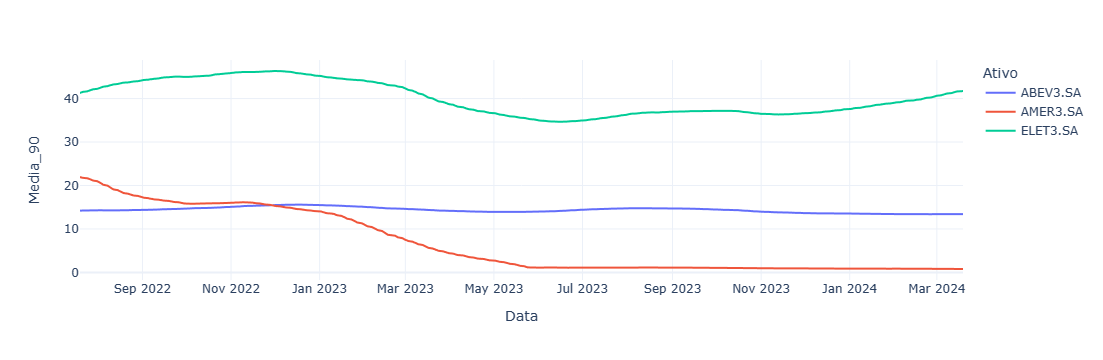

In [27]:
#Montando um gráfico de linhas para as médias móveis dos ativos
#Criando o Dataframe para usar o Ploty
df_med_movel_90_vertical = df_med_movel_90 .stack().reset_index()
df_med_movel_90_vertical.columns = ['Data', 'Ativo', 'Media_90']
#criando e exibindo o gráfico
fig = px.line(df_med_movel_90_vertical, x="Data", y="Media_90", color='Ativo', template ='plotly_white')
fig.show()

C:\Users\willi\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



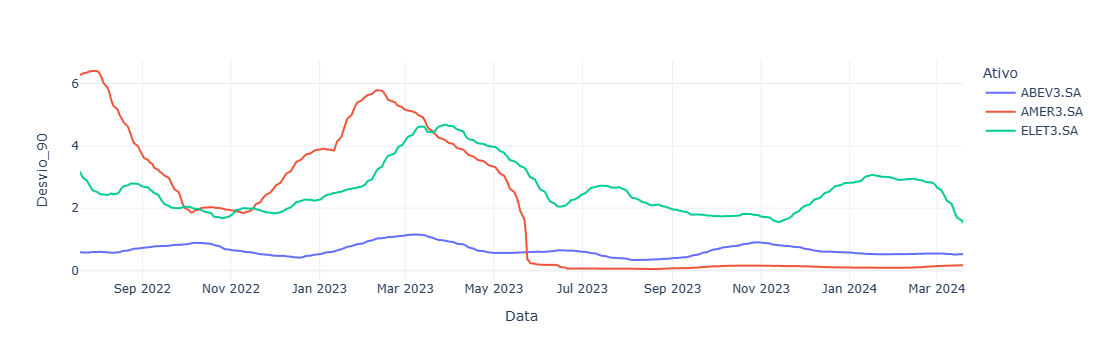

In [21]:
#Montando um gráfico de linhas para as médias móveis dos ativos
#Criando o Dataframe para usar o Ploty
df_std_movel_90_vertical = df_std_movel_90.stack().reset_index()
df_std_movel_90_vertical.columns = ['Data', 'Ativo', 'Desvio_90']
#criando e exibindo o gráfico
fig = px.line(df_std_movel_90_vertical, x="Data", y="Desvio_90", color='Ativo', template ='plotly_white')
fig.show()

Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

O ativo com maior volatilidade continua sendo o da ELET3.SA

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [47]:
data_60_dias_atras = datetime.now() - timedelta(days=60) #Subtrai 60 dias da data atual
data_60_dias_atras_string = data_60_dias_atras.strftime("%d/%m/%Y") #transforma e formata o objjeto datetime em string 
lista_indicadores = [ 'Close', 'High', 'Low', 'Open'] #lista com o nome dos indicadores necessários de df para o candlestick
ativo = ['ELET3.SA']*len(lista_indicadores) #lista com 4x o nome do ativo para montarmos uma tupla para usar na seleção
selecao_colunas = list(zip(lista_indicadores, ativo)) #cria tupla correspondente ao ativo e aos indicadores que será selecionado no df
df_elet_60 = df.loc[data_60_dias_atras_string:,selecao_colunas] #cria dataframe com a seleção dos indicadores dos últimos 60 dias
df_elet_60.columns = lista_indicadores #renomeia as colunas retirando os 2 níveis
df_elet_60

,Close,High,Low,Open
Date,,,,
2024-01-19,41.709999,42.189999,41.160000,41.160000
2024-01-22,40.779999,42.060001,40.459999,42.000000
2024-01-23,41.029999,41.430000,40.590000,40.869999
2024-01-24,41.070000,41.439999,40.810001,41.279999
2024-01-25,41.130001,41.459999,40.900002,41.150002
2024-01-26,40.860001,41.439999,40.860001,41.310001
2024-01-29,40.869999,41.520000,40.790001,40.880001
2024-01-30,40.209999,40.849998,40.000000,40.820000
2024-01-31,40.810001,41.500000,40.400002,40.580002


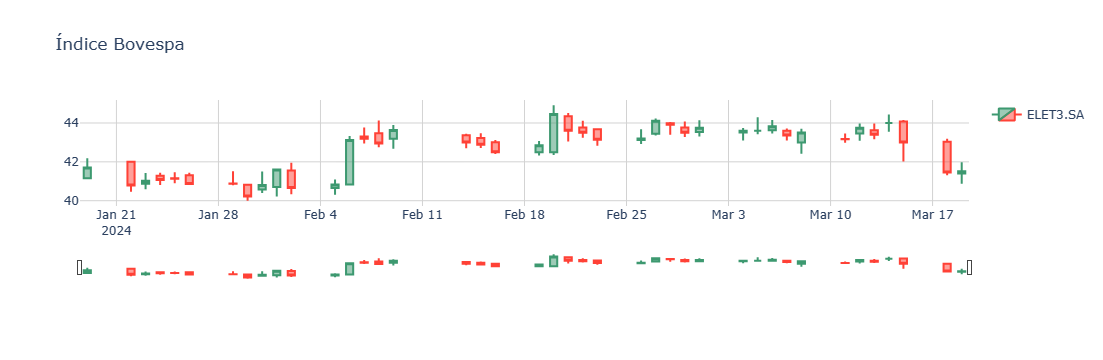

In [48]:
#Contruindo o gráfico candlestick
#Criando dicionário para gerar o candlestick
graph = {
    'x': df_elet_60.index, #o valor que deve entrar no eixo x: Datas
    'open': df_elet_60.Open, #o valor de abertura do ativo
    'close': df_elet_60.Close, #o valor de fechamento do ativo
    'high': df_elet_60.High, #o valor máximo do ativo
    'low': df_elet_60.Low,  #o valor mínimo do ativo
    'type': 'candlestick', # o tipo de gráfico que vai ser um candlestick
    'name': 'ELET3.SA', #o nome do ativo que vai aparecer na legenda
    'showlegend': True #define se deve ou não mostrar a legenda
}

#Montando o gráfico

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title="Índice Bovespa",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico